In [0]:
import pandas as pd
import gc
import imutils
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader, random_split
from albumentations import Flip,Compose,Normalize,Resize,RandomCrop
import torch.optim as optim
from albumentations.pytorch.transforms import ToTensor
import numpy as np
import torch
import torch.nn as nn
import os
import cv2
from skimage import io
import matplotlib.image as mpimg
from torchvision import transforms
import torch.nn.functional as F
import skimage
import math
from models import Net

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Loading model and weights

In [4]:
model = Net()
model = model.to(device)
model

Net(
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2, inplace=False)
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=86528, out_features=136, bias=True)
)

In [5]:
# we will use conly cpu for detection.so we will mark device as cpu 
state_dict = torch.load('model_may14.pt',map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

## Prdiction and detection

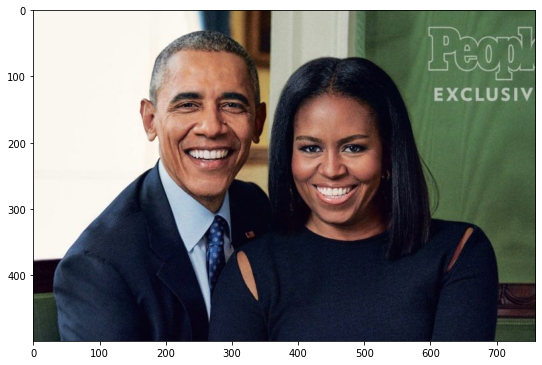

In [6]:
# load in color image for face detection
image = cv2.imread('images/obamas.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

### Face detection using HaarCascades

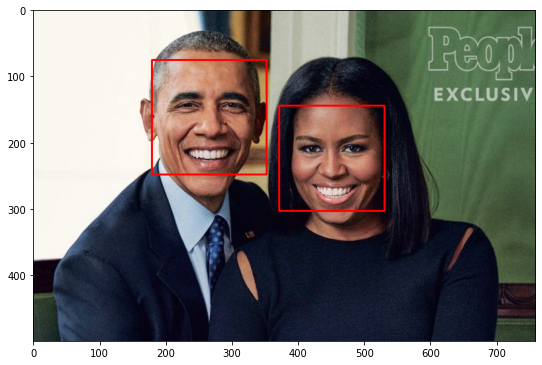

In [7]:
face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, 1.2, 2)

img = np.copy(image)
for coords in faces:
    x,y,w,h = coords[0],coords[1],coords[2],coords[2]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0), 2)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(img)

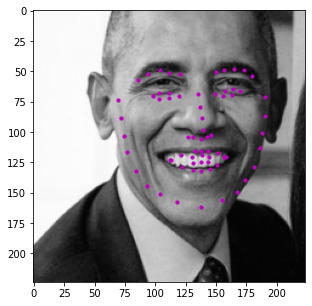

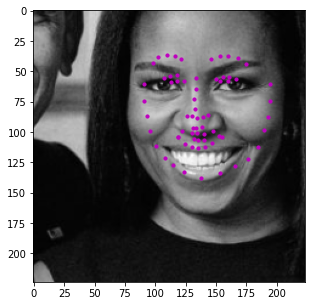

In [8]:
def show_all_keypoints(image, keypoints):
    """
    Visuzlizing the image and the keypoints on it.
    """
    plt.figure(figsize=(5,5))
    
    keypoints = keypoints.data.numpy()
    keypoints = keypoints * 50.0 + 100 # Becuase of normalization, keypoints won't be placed if they won't reutrn to values before noramlization 
    keypoints = np.reshape(keypoints, (68, -1)) # reshape to 2 X 68 keypoint for the fase

    image = image.numpy()   
    image = np.transpose(image, (1, 2, 0))  # Convert to numpy image shape (H x W x C)
    image = np.squeeze(image)
    plt.imshow(image, cmap='gray')
    plt.scatter(keypoints[:, 0], keypoints[:, 1], s=40, marker='.', c='m')





image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:

    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)]
    #plt.imshow(roi)
    
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi / 255.
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = np.expand_dims(roi, 0)
    roi = np.expand_dims(roi, 0) 

    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    roi_torch = torch.from_numpy(roi) # Converting numpy to torch variable
    #print(roi_torch.shape)
    roi_torch = roi_torch.type(torch.FloatTensor)
    keypoints = model(roi_torch) # Forward pass
    
    ## TODO: Display each detected face and the corresponding keypoints        
    show_all_keypoints(roi_torch.squeeze(0), keypoints)

## More detections

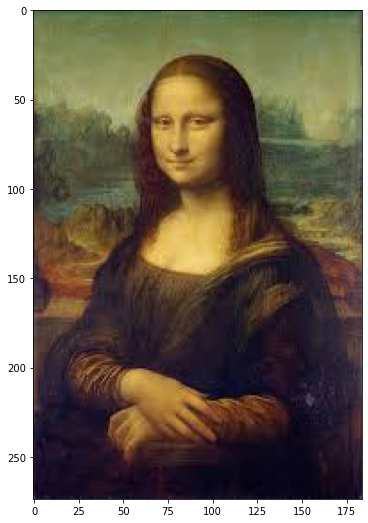

In [9]:
# load in color image for face detection
image = cv2.imread('images/mona_lisa.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(image)

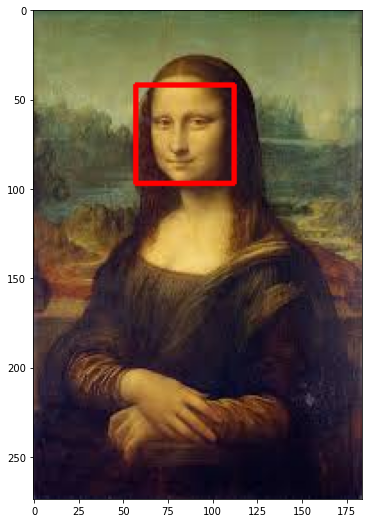

In [10]:


face_cascade = cv2.CascadeClassifier('detector_architectures/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(image, 1.2, 2)

img = np.copy(image)
for coords in faces:
    x,y,w,h = coords[0],coords[1],coords[2],coords[2]
    cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0), 2)

# plot the image
fig = plt.figure(figsize=(9,9))
plt.imshow(img)

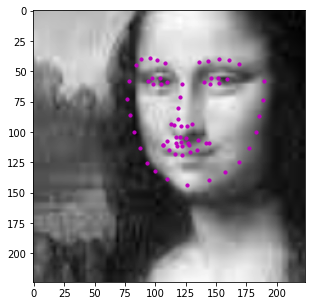

In [11]:
image_copy = np.copy(image)

# loop over the detected faces from your haar cascade
for (x,y,w,h) in faces:

    # Select the region of interest that is the face in the image 
    roi = image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)]
    #plt.imshow(roi)
    
    ## TODO: Convert the face region from RGB to grayscale
    roi = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Normalize the grayscale image so that its color range falls in [0,1] instead of [0,255]
    roi = roi / 255.
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Rescale the detected face to be the expected square size for your CNN (224x224, suggested)
    roi = cv2.resize(roi, (224, 224))
    #plt.imshow(roi, cmap = 'gray')
    
    ## TODO: Reshape the numpy image shape (H x W x C) into a torch image shape (C x H x W)
    roi = np.expand_dims(roi, 0)
    roi = np.expand_dims(roi, 0) 

    ## TODO: Make facial keypoint predictions using your loaded, trained network 
    ## perform a forward pass to get the predicted facial keypoints
    roi_torch = torch.from_numpy(roi) # Converting numpy to torch variable
    #print(roi_torch.shape)
    roi_torch = roi_torch.type(torch.FloatTensor)
    keypoints = model(roi_torch) # Forward pass
    
    ## TODO: Display each detected face and the corresponding keypoints        
    show_all_keypoints(roi_torch.squeeze(0), keypoints)

## Now we write a python class by incoperating all these and it will return full image with keypoints annotated in it

In [0]:
class FaceDetect():
    def __init__(self,cascade_path,model):
      self.image_path = image_path
      self.cascade_path = cascade_path
      self.image_bgr = cv2.imread(image_path)
      self.image = cv2.cvtColor(self.image_bgr, cv2.COLOR_BGR2RGB)
      self.model = model
    
    def face_detection(self,image_path):
      image_bgr = cv2.imread(image_path)
      image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
      face_cascade = cv2.CascadeClassifier(self.cascade_path)
      faces = face_cascade.detectMultiScale(image, 1.2, 2)
      image_copy = np.copy(image)
      final_images = []
      if len(faces) > 0:
        
        for i,(x,y,w,h) in enumerate(faces):
              cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255, 0, 0), 2)

              
              # crop the section # we will increase the crop size as usually haarcascades won't cover full face
              img_pre = image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)]
              # img_pre = image_copy[y:y+h,x:x+w]

              #keeping a copy to draw keypoints and processing
              img_copy = np.copy(img_pre)
              img_draw = cv2.resize(img_copy,(224,224))

              # grayscale -> normalize -> resize(224,224) -> tensor_batch(1,1,224,224)
              img_batch = self.preprocess(img_pre)
              # prediction
              kps = self.model(img_batch)
              # denormalize keypoints and adjust values
              kps = self.denorm_kps(kps)

              # drawig keypoints
              for x_,y_ in kps:
                  cv2.circle(img_draw,(x_,y_),radius=3,color=(0,255,0),thickness=-1)

              # resizing to size of original crop
              height,width = img_pre.shape[0],img_pre.shape[1]
              final_img = cv2.resize(img_draw,(width,height))
            
              image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)] = final_img
              # image_copy[y:y+h,x:x+w] = final_img

      else:
          print('No face detected')

      return image_copy

    @staticmethod
    def denorm_kps(kpts):
      kpts = kpts.view(68,-1)
      kpts = kpts.cpu().detach().numpy()
      kpts = (kpts*50) + 100 #denormalize keypoints
      return kpts
    
    @staticmethod
    def preprocess(pre_img):
      #gray scale
      img = cv2.cvtColor(pre_img, cv2.COLOR_RGB2GRAY)
      #normalize
      img = img/255.0
      # resizing 
      img = cv2.resize(img,(224,224))
      # convert to numpy format   #(224,224) to (1,1,224,224)
      img = np.expand_dims(img,0)
      img = np.expand_dims(img,0)
      img = img.astype('float32')
      img = torch.from_numpy(img)
      
      return img

#Static methods have a very clear use-case. When we need some functionality not w.r.t an Object but w.r.t the complete class

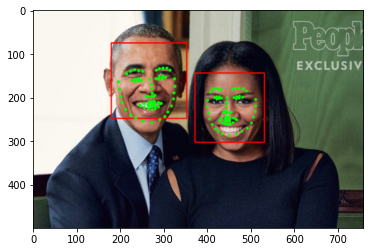

In [13]:
cascade_path = 'detector_architectures/haarcascade_frontalface_default.xml'
image_path = 'images/obamas.jpg'
model.eval()
pred = FaceDetect(cascade_path,model)

img = pred.face_detection(image_path)

plt.imshow(img)

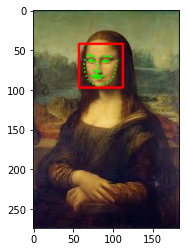

In [14]:
cascade_path = 'detector_architectures/haarcascade_frontalface_default.xml'
image_path = 'images/mona_lisa.jpg'
model.eval()
pred = FaceDetect(cascade_path,model)

img = pred.face_detection(image_path)

plt.imshow(img)

## Masking sunglasses based on facial keypoints

Image shape:  (1123, 3064, 4)


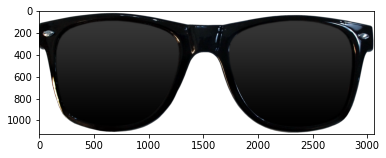

In [15]:
# load in sunglasses image with cv2 and IMREAD_UNCHANGED
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)

# plot our image
plt.imshow(sunglasses)

# print out its dimensions
print('Image shape: ', sunglasses.shape)

### Alpha channel

We can see 4 color channels, not just 3 as your avg RGB image does. This is due to the flag we set cv2.IMREAD_UNCHANGED, which tells this to read in another color channel.
Alpha channel

It has the usual red, blue, and green channels any color image has, and the 4th channel respresents the transparency level of each pixel in the image; this is often called the alpha channel. Here's how the transparency channel works: the lower the value, the more transparent, or see-through, the pixel will become. The lower bound (completely transparent) is zero here, so any pixels set to 0 will not be seen; these look like white background pixels in the image above, but they are actually totally transparent.

This transparent channel allows us to place this rectangular image of sunglasses on an image of a face and still see the face area that is techically covered by the transparentbackground of the sunglasses image!

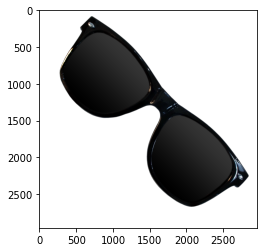

In [16]:
# just check a rotated version of glasses which we will use later
rotated = imutils.rotate_bound(sunglasses, 45)
plt.imshow(rotated)

The alpha channel looks like this (black pixels = transparent): 


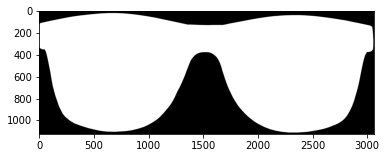

In [17]:
# print out the sunglasses transparency (alpha) channel
alpha_channel = sunglasses[:,:,3]
print ('The alpha channel looks like this (black pixels = transparent): ')
plt.imshow(alpha_channel, cmap='gray')

In [18]:
# just to double check that there are indeed non-zero values
# let's find and print out every value greater than zero
values = np.where(alpha_channel != 0)
print ('The non-zero values of the alpha channel are: ')
print (values)


The non-zero values of the alpha channel are: 
(array([  17,   17,   17, ..., 1109, 1109, 1109]), array([ 687,  688,  689, ..., 2376, 2377, 2378]))


It may be useful to use keypoints that correspond to the edges of the face to define the width of the sunglasses, and the locations of the eyes to define the placement.

In [19]:
# load in training data
key_pts_frame = pd.read_csv('data/training_frames_keypoints.csv')

# print out some stats about the data
print('Number of images: ', key_pts_frame.shape[0])

Number of images:  3462


Image name:  Martin_Sheen_41.jpg


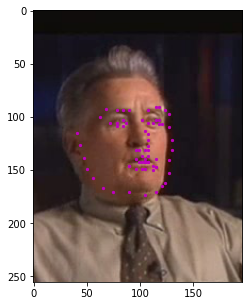

In [21]:
# helper function to display keypoints
def show_keypoints(image, key_pts):
    """Show image with keypoints"""
    plt.imshow(image)
    plt.scatter(key_pts[:, 0], key_pts[:, 1], s=20, marker='.', c='m')

train_csv = 'data/training_frames_keypoints.csv'
# a selected image
n = 120
df = pd.read_csv(train_csv)


image_list = os.listdir('data/training/')
image_name = image_list[29] 
image = mpimg.imread(os.path.join('data/training/', image_name))


key_pts = df[df['Unnamed: 0'] == image_name].values[0][1:].astype('float').reshape(-1,2)

print('Image name: ', image_name)

plt.figure(figsize=(5, 5))
show_keypoints(image, key_pts)
plt.show()

-1.5444866095419745


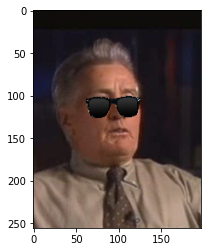

In [22]:
# copy of the face image for overlay
image_copy = np.copy(image)

# top-left location for sunglasses to go
# 17 = edge of left eyebrow
x = int(key_pts[17, 0])
y = int(key_pts[17, 1])

x2 = int(key_pts[1,0])
y2 = int(key_pts[1,0])


slope = (y2-y) - (x2-x)
theta = math.atan(slope)
print(theta)

# height and width of sunglasses
# h = length of nose
h = int(abs(key_pts[27,1] - key_pts[34,1]))
# w = left to right eyebrow edges
w = int(abs(key_pts[17,0] - key_pts[26,0]))

# read in sunglasses
sunglasses = cv2.imread('images/sunglasses.png', cv2.IMREAD_UNCHANGED)
sunglasses = imutils.rotate_bound(sunglasses, theta)
# resize sunglasses
new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)



# get region of interest on the face to change
roi_color = image_copy[y:y+h,x:x+w]

# find all non-transparent pts
ind = np.argwhere(new_sunglasses[:,:,3] > 0)

# for each non-transparent point, replace the original image pixel with that of the new_sunglasses
for i in range(3):
    roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    

# set the area of the image to the changed region with sunglasses
image_copy[y:y+h,x:x+w] = roi_color


# display the result!
plt.imshow(image_copy)


In [0]:
class FaceGlassDetect():
    def __init__(self,cascade_path,model):
      self.image_path = image_path
      self.cascade_path = cascade_path
      self.image_bgr = cv2.imread(image_path)
      self.image = cv2.cvtColor(self.image_bgr, cv2.COLOR_BGR2RGB)
      self.glass_path = 'images/sunglasses.png'
      self.model = model
    
    def face_detection(self,image_path):
      image_bgr = cv2.imread(image_path)
      image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
      face_cascade = cv2.CascadeClassifier(self.cascade_path)
      faces = face_cascade.detectMultiScale(image, 1.2, 2)
      image_copy = np.copy(image)
      final_images = []
      if len(faces) > 0:
        
        for i,(x,y,w,h) in enumerate(faces):
              cv2.rectangle(image_copy,(x,y),(x+w,y+h),(255, 0, 0), 2)

              
              # crop the section # we will increase the crop size as usually haarcascades won't cover full face
              img_pre = image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)]
              # img_pre = image_copy[y:y+h,x:x+w]

              #keeping a copy to draw keypoints and processing
              img_copy = np.copy(img_pre)
              img_draw = cv2.resize(img_copy,(224,224))

              # grayscale -> normalize -> resize(224,224) -> tensor_batch(1,1,224,224)
              img_batch = self.preprocess(img_pre)
              # prediction
              kps = self.model(img_batch)
              # denormalize keypoints and adjust values
              kps = self.denorm_kps(kps)
              
              #implant glasses
              out_image = self.create_glass(img_draw,kps)


              # resizing to size of original crop
              height,width = img_pre.shape[0],img_pre.shape[1]
              final_img = cv2.resize(out_image,(width,height))
            
              image_copy[y:y + int(1.5 * h), x - int(0.4 * w):x + int(1.1 * w)] = final_img
              # image_copy[y:y+h,x:x+w] = final_img

      else:
          print('No face detected')

      return image_copy

    def create_glass(self,image,key_pts):
      # copy of the face image for overlay
      image_copy = np.copy(image)
      x,y = int(key_pts[17, 0]),int(key_pts[17, 1])

      x2 = int(key_pts[1,0])
      y2 = int(key_pts[1,0])


      slope = (y2-y) - (x2-x)
      theta = math.atan(slope)

      # height and width of sunglasses # h = length of nose
      h = int(abs(key_pts[27,1] - key_pts[34,1])) + 5
      
      # w = left to right eyebrow edges
      w = int(abs(key_pts[17,0] - key_pts[26,0])) + 10

      # read in sunglasses
      sunglasses = cv2.imread(self.glass_path, cv2.IMREAD_UNCHANGED)

      sunglasses = imutils.rotate_bound(sunglasses, theta)
      # resize sunglasses
      new_sunglasses =  cv2.resize(sunglasses, (w, h), interpolation = cv2.INTER_CUBIC)


      # get region of interest on the face to change
      roi_color = image_copy[y:y+h,x:x+w]

      # find all non-transparent pts
      ind = np.argwhere(new_sunglasses[:,:,3] > 0)

      # for each non-transparent point, replace the original image pixel with that of the new_sunglasses
      for i in range(3):
          roi_color[ind[:,0],ind[:,1],i] = new_sunglasses[ind[:,0],ind[:,1],i]    

      # set the area of the image to the changed region with sunglasses
      image_copy[y:y+h,x:x+w] = roi_color

      return image_copy

    @staticmethod
    def denorm_kps(kpts):
      kpts = kpts.view(68,-1)
      kpts = kpts.cpu().detach().numpy()
      kpts = (kpts*50) + 100 #denormalize keypoints
      return kpts
    
    @staticmethod
    def preprocess(pre_img):
      #gray scale
      img = cv2.cvtColor(pre_img, cv2.COLOR_RGB2GRAY)
      #normalize
      img = img/255.0
      # resizing 
      img = cv2.resize(img,(224,224))
      # convert to numpy format   #(224,224) to (1,1,224,224)
      img = np.expand_dims(img,0)
      img = np.expand_dims(img,0)
      img = img.astype('float32')
      img = torch.from_numpy(img)
      
      return img

#Static methods have a very clear use-case. When we need some functionality not w.r.t an Object but w.r.t the complete class

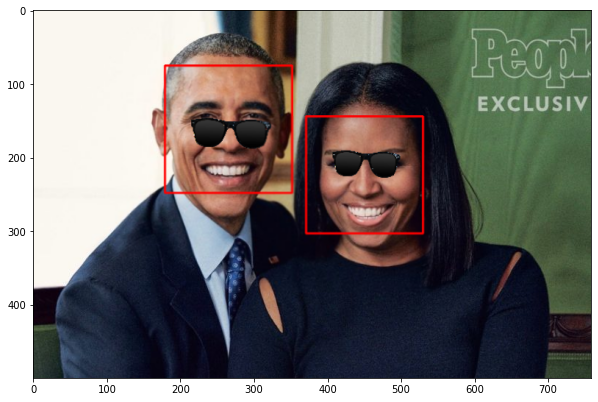

In [24]:
cascade_path = 'detector_architectures/haarcascade_frontalface_default.xml'
image_path = 'images/obamas.jpg'
model.eval()
pred = FaceGlassDetect(cascade_path,model)

img = pred.face_detection(image_path)

plt.figure(figsize=(10,10))
plt.imshow(img)

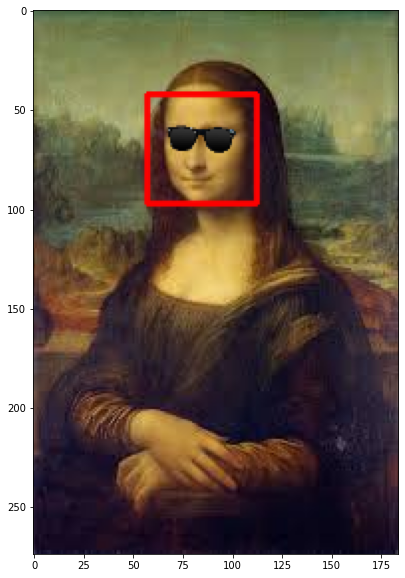

In [25]:
lscascade_path = 'detector_architectures/haarcascade_frontalface_default.xml'
image_path = 'images/mona_lisa.jpg'
model.eval()
pred = FaceGlassDetect(cascade_path,model)

img = pred.face_detection(image_path)
plt.figure(figsize=(10,10))
plt.imshow(img)